# Titanic dataset

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df=pd.read_csv(r"C:\Users\Harshitha\Downloads\titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.shape

(891, 12)

There are 891 rows and 12 columns 

In [6]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Making summary statistics for the dataset

## Visualization

<AxesSubplot:>

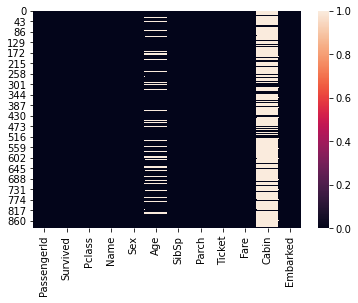

In [9]:
sns.heatmap(df.isnull())

<AxesSubplot:>

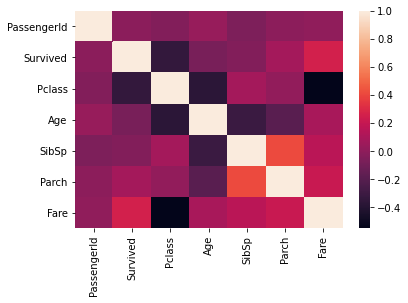

In [10]:
dfcor=df.corr()
dfcor
sns.heatmap(dfcor)

<AxesSubplot:>

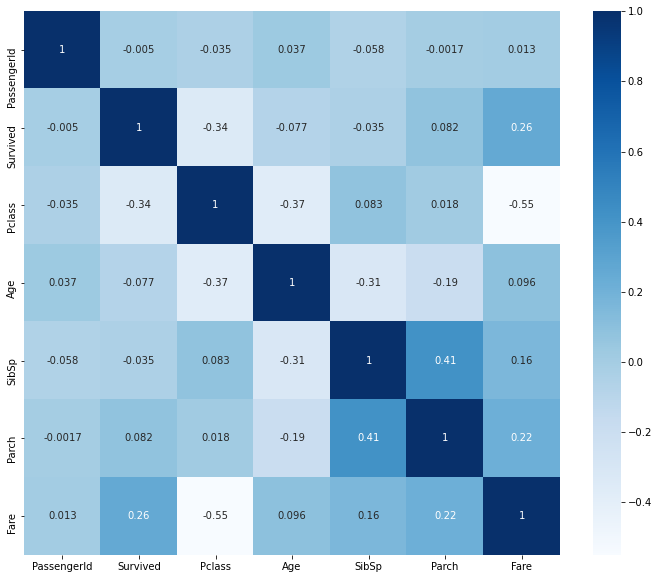

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(dfcor,cmap='Blues',annot=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

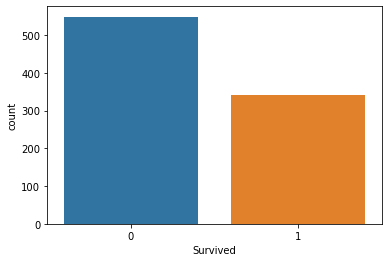

In [12]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

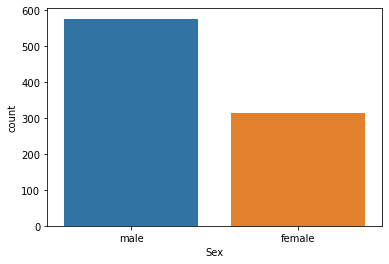

In [13]:
sns.countplot(df['Sex'])

## Univariate Analysis

<AxesSubplot:ylabel='Frequency'>

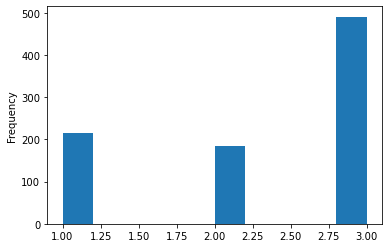

In [14]:
df['Pclass'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

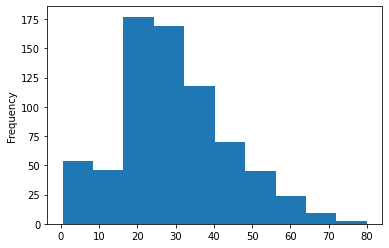

In [15]:
df['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

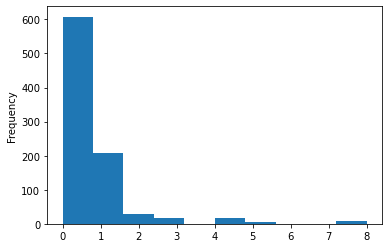

In [16]:
df['SibSp'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

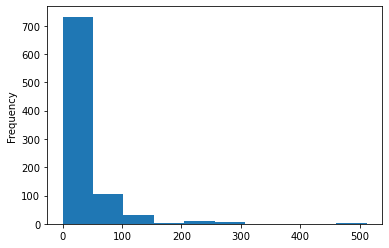

In [17]:
df['Fare'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

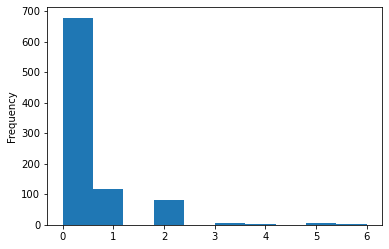

In [18]:
df['Parch'].plot.hist()

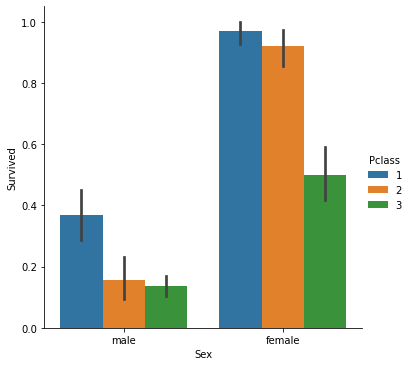

In [19]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df)

In [20]:
bins = [0, 10, 20, 30, 40, 50, 60,70,99]
df['AgeBinned'] = pd.cut(df['Age'], bins)
df[["AgeBinned", "Survived"]].groupby(['AgeBinned']).mean()

,Survived
AgeBinned,
"(0, 10]",0.593750
"(10, 20]",0.382609
"(20, 30]",0.365217
"(30, 40]",0.445161
"(40, 50]",0.383721
"(50, 60]",0.404762
"(60, 70]",0.235294
"(70, 99]",0.200000


<AxesSubplot:xlabel='AgeBinned', ylabel='count'>

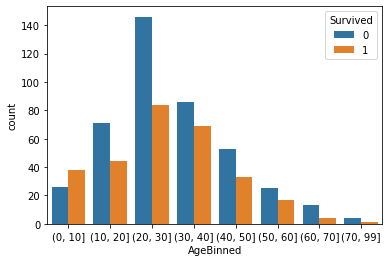

In [21]:
sns.countplot(x ='AgeBinned', hue = "Survived", data = df)

<AxesSubplot:>

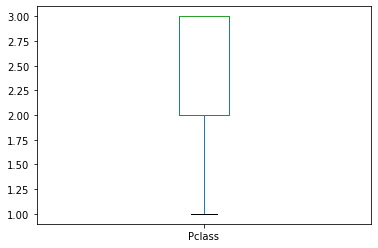

In [22]:
df['Pclass'].plot.box()

<AxesSubplot:>

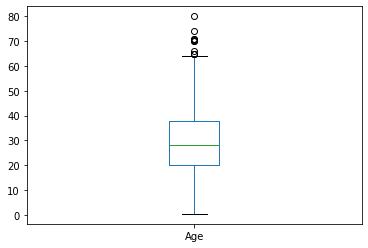

In [23]:
df['Age'].plot.box()

<AxesSubplot:>

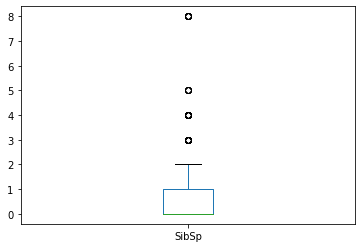

In [24]:
df['SibSp'].plot.box()

<AxesSubplot:>

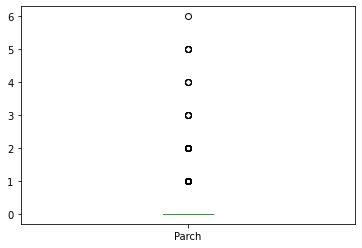

In [25]:
df['Parch'].plot.box()

<AxesSubplot:>

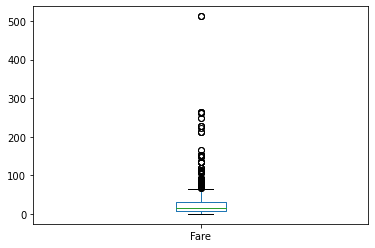

In [26]:
df['Fare'].plot.box()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

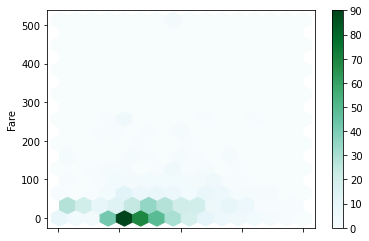

In [27]:
df.plot.hexbin(x='Age', y='Fare', gridsize=15)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

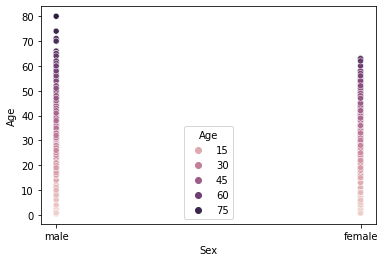

In [28]:

sns.scatterplot(data=df, x="Sex", y="Age", hue="Age")

<AxesSubplot:xlabel='SibSp', ylabel='Parch'>

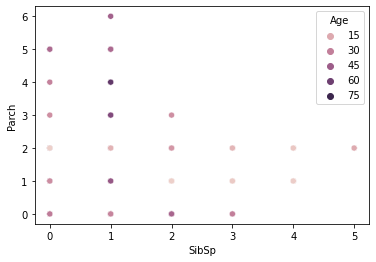

In [29]:
sns.scatterplot(data=df, x="SibSp", y="Parch", hue="Age")

In [30]:
collist=df.columns.values
ncol=12
nrows=10

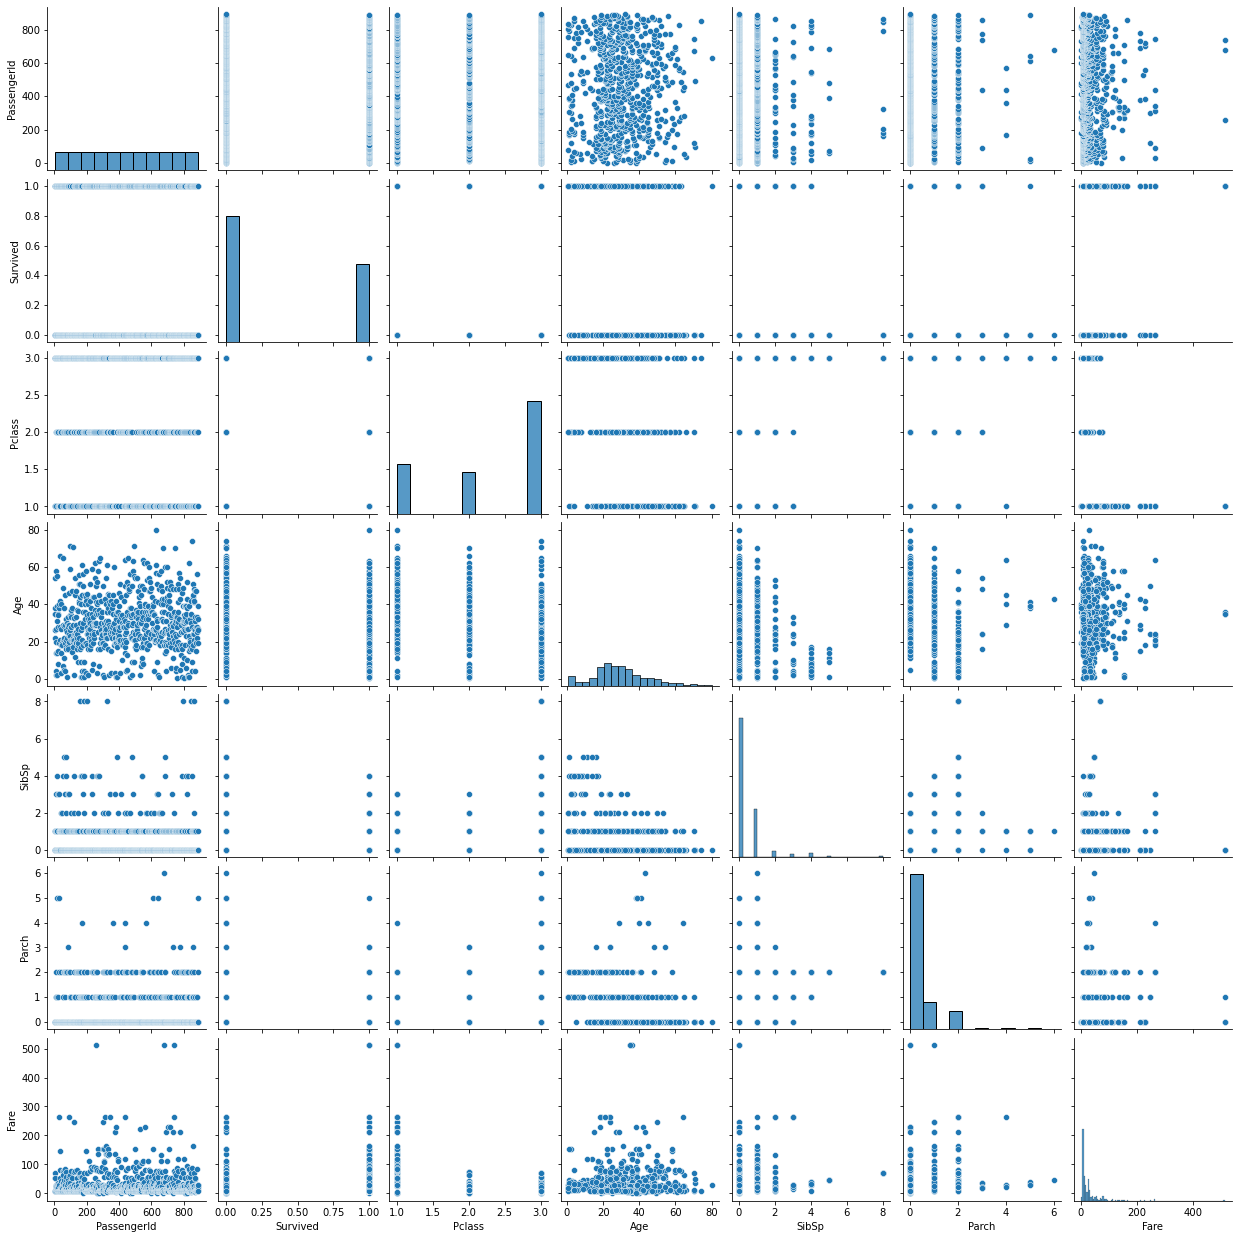

In [31]:
sns.pairplot(df)

AxesSubplot(0.125,0.125;0.775x0.755)


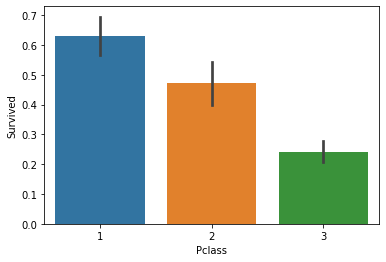

In [32]:
#ploting bar plot between 'Pclass'and 'Survived'
a=sns.barplot(x='Pclass',y='Survived',data=df)
print(a)

AxesSubplot(0.125,0.125;0.775x0.755)


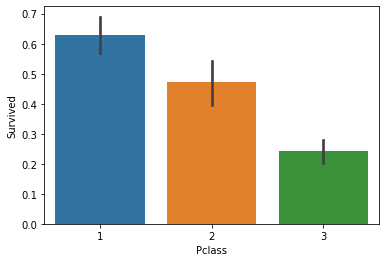

In [33]:
#ploting bar plot between 'Pclass'and 'Survived'
a=sns.barplot(x='Pclass',y='Survived',data=df)
print(a)

AxesSubplot(0.125,0.125;0.775x0.755)


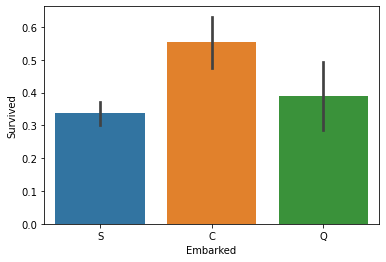

In [34]:
#ploting bar plot between 'Embarked'and 'Survived'
a=sns.barplot(x='Embarked',y='Survived',data=df)
print(a)

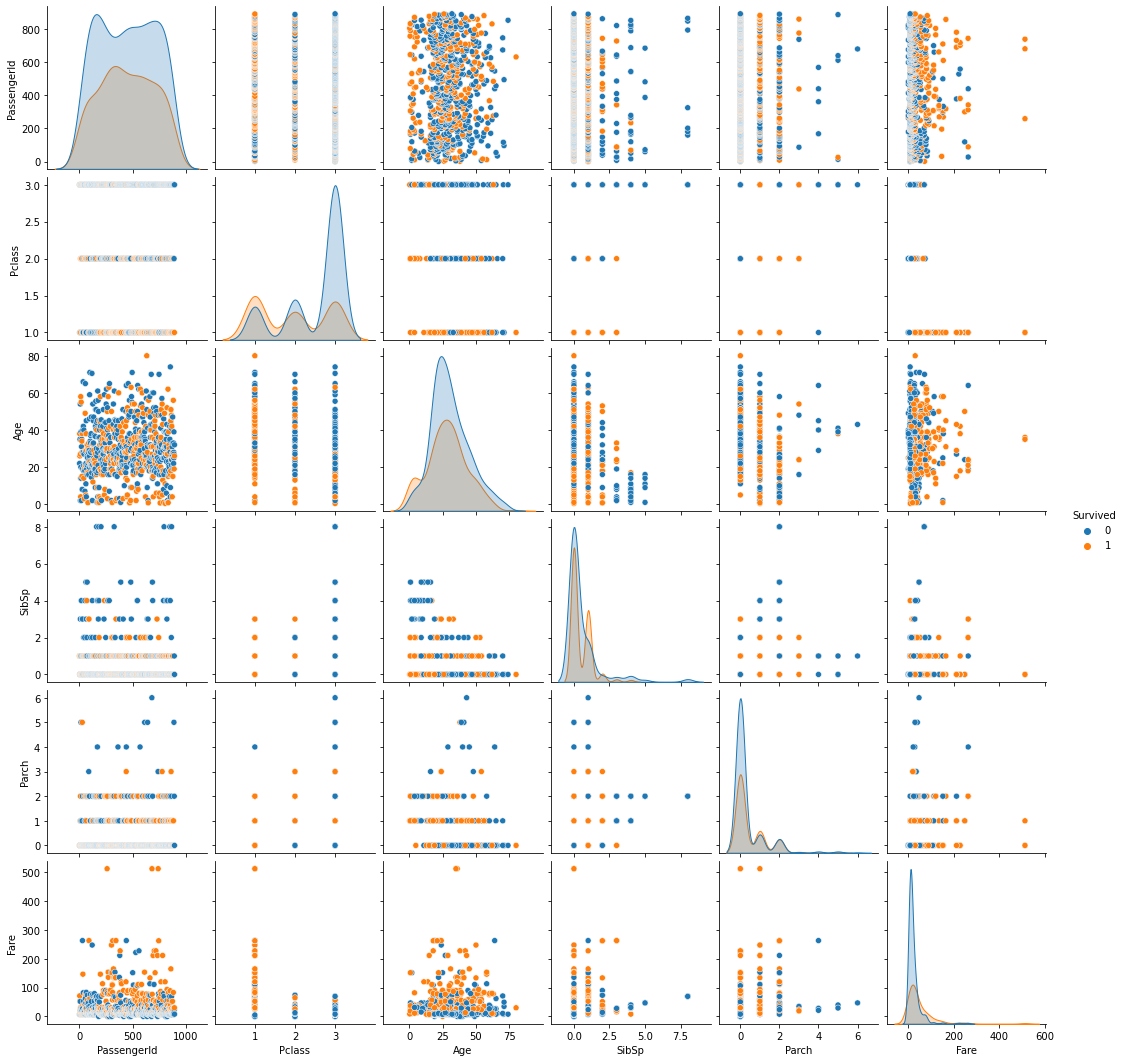

In [35]:
#ploting pair plot for our data set
sns.pairplot(df,hue='Survived')

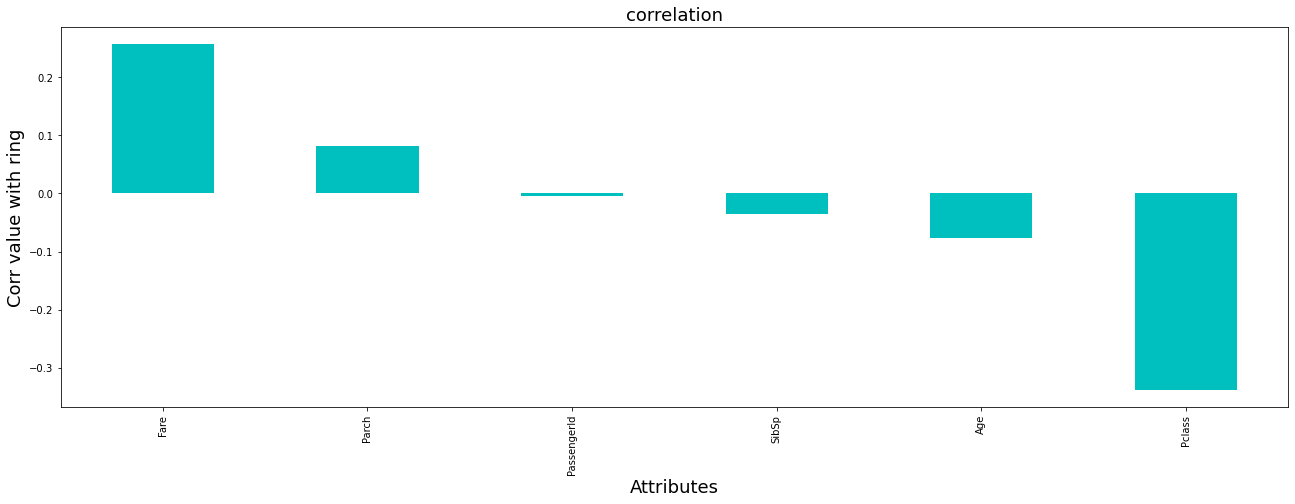

In [36]:
#plotting correlation value of each attribute with Survived column
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Attributes',fontsize=18)
plt.ylabel('Corr value with ring',fontsize=18)
plt.title('correlation',fontsize=18)
plt.show()

In [37]:
#filling missing value by median
df['Age'].fillna(df['Age'].median(),inplace=True)

In [38]:
#droping the missing value
df = df.dropna(how='any',axis=0)

In [39]:
#converting sex column into float data type
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

df['Sex']=enc.fit_transform(df['Sex'].values.reshape(-1,1))

In [40]:

df['Embarked']=enc.fit_transform(df['Embarked'].values.reshape(-1,1))

In [41]:
#Removing outlier by Z score method
df_NEW=df
from scipy.stats import zscore
z=np.abs(zscore(df))
df_NEW=df_NEW[(z<3).all(axis=1)]
print("Before removing outliers::",df.shape)
print("After removing outliers::",df_NEW.shape)
p=100-(len(df_NEW.index)/len(df.index)*100)
print(f'We are loosing {p} % of data.   ')

TypeError: unsupported operand type(s) for +: 'pandas._libs.interval.Interval' and 'pandas._libs.interval.Interval'

In [ ]:
#Removing outlier by IOR method
df_new2=df
from scipy import stats
IQR = stats.iqr(df) 
print('IQR =',IQR)
Q1 = df_new2.quantile(0.25)
Q3 = df_new2.quantile(0.75)
df_new2 = df_new2[~((df_new2 < (Q1 - 1.5 * IQR)) |(df_new2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print('df shape after IQR',df_new2.shape)
p=100-(len(df_new2.index)/len(df.index)*100)
print(f'We are loosing {p} % of data.   ')

In [ ]:

#checking the skewness
df.skew()

In [ ]:
#Removing skewness from Fare column
df['Fare']=np.log(df['Fare']+1)

In [ ]:
#Creating the dependent and independent variable
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [ ]:

#scaling using standard scalar
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x=scalar.fit_transform(x)

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [ ]:
#selecting best random state
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is ',maxAccu,' on random state ',maxRS)

In [ ]:
#train, test, split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=81)

In [ ]:
#building model using RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
print('score:',RFC.score(x_train,y_train))
print('\n')
print("Accuracy score :",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [ ]:
#cross validation of randon forest classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
y_pred=ABC.predict(x_test)
train_pred=ABC.predict(x_train)
print('score:',RFC.score(x_train,y_train))
print('\n')
print("Accuracy score :",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [ ]:

#cross validation of randon forest classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

In [ ]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
print('score:',RFC.score(x_train,y_train))
print('\n')
print("Accuracy score :",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [ ]:
print(cross_val_score(DTC,x,y,cv=5).mean())

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('score:',RFC.score(x_train,y_train))
print('\n')
print("Accuracy score :",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [ ]:
print(cross_val_score(knn,x,y,cv=5).mean())

In [ ]:

#Hyper parameter tuning for Random Forest Classifier
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}
RFC1=RandomForestClassifier()
clf=GridSearchCV(RFC1,parameters)
clf.fit(x_test,y_test)
print(clf.best_params_)

In [ ]:
RFC1=RandomForestClassifier(criterion='entropy',max_features='auto')
RFC1.fit(x_train,y_train)
pred=RFC1.predict(x_test)
print('score:',RFC1.score(x_train,y_train))
print('\n')
print("Accuracy score :",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [ ]:

print(cross_val_score(RFC1,x,y,cv=5).mean())

In [ ]:
#Hyper parameter tuning for Decision Tree Classifier
parameters={'criterion':['gini','entropy'],'max_depth':list(range(1,50))}
DTC1=DecisionTreeClassifier()
clf=GridSearchCV(DTC1,parameters)
clf.fit(x_test,y_test)
print(clf.best_params_)

In [ ]:
DTC1=DecisionTreeClassifier(criterion='gini',max_depth=1)
DTC1.fit(x_train,y_train)
pred=DTC1.predict(x_test)
print('score:',DTC1.score(x_train,y_train))
print('\n')
print("Accuracy score :",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [ ]:

print(cross_val_score(DTC1,x,y,cv=5).mean())

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


y_pred_prob=RFC1.predict_proba(x_test)[:,1]
frp,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(frp,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True posotive rate')
plt.title('Random forest classifier')
plt.show()

In [ ]:
auc_score=roc_auc_score(y_test,RFC1.predict(x_test))
print(auc_score)

In [ ]:
#saving the model
import joblib
joblib.dump(RFC1,'FinalModel.pkl')